In [178]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [179]:
songs_data = pd.read_csv("../data/spotify-tracks.csv", index_col=0)

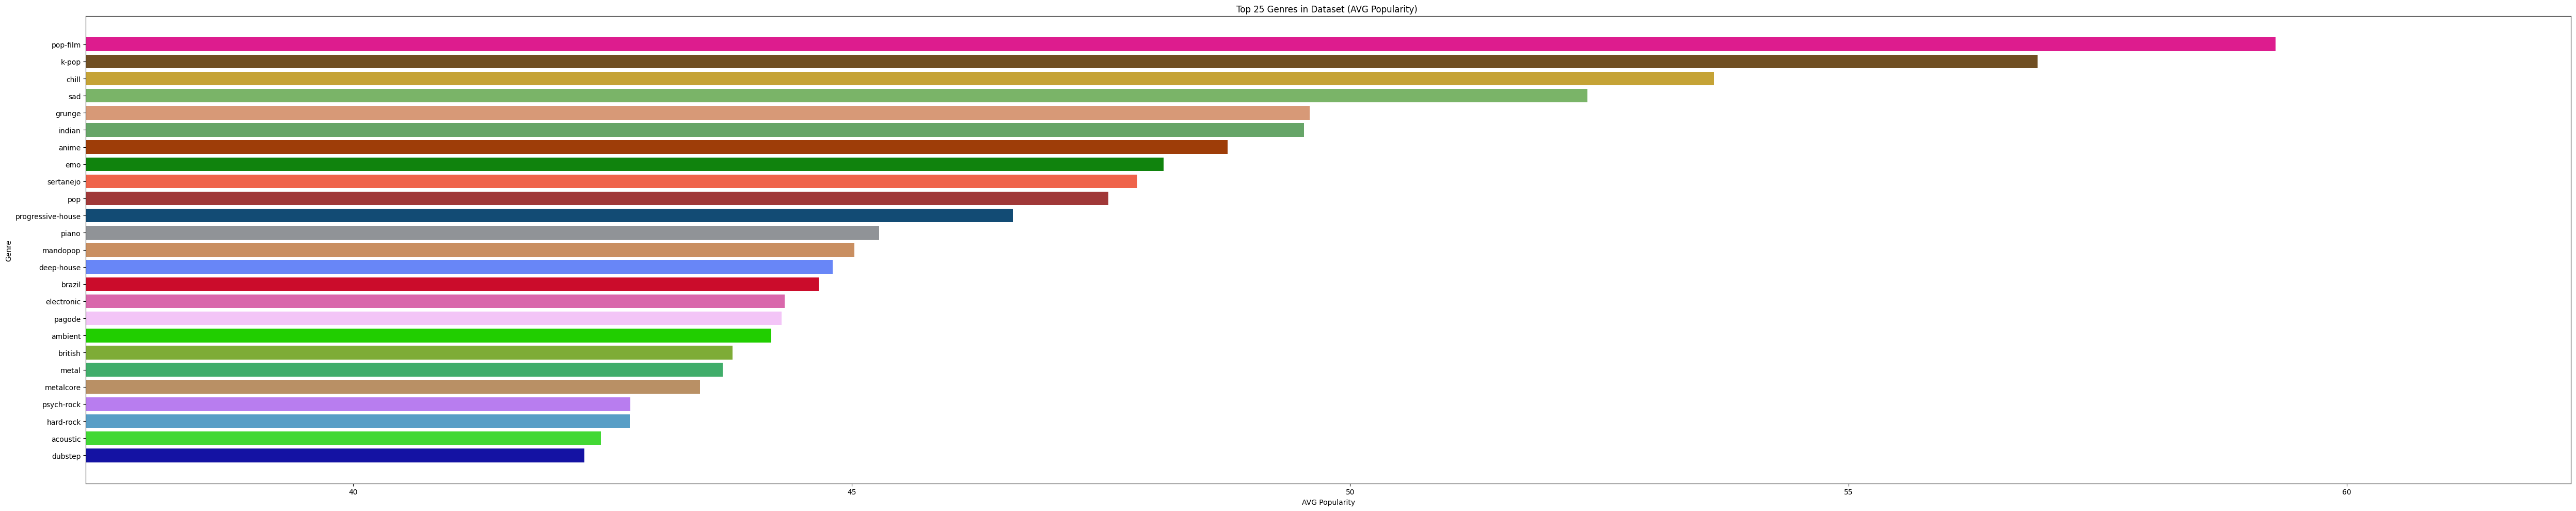

In [180]:
num = 25
byGenre = songs_data.groupby('track_genre').mean().reset_index()
byGenre = byGenre.sort_values('popularity', ascending=False)
loc = byGenre['track_genre']
byGenre = byGenre.head(num)
# byGenre.to_csv('../data/byGenre.csv')

x = byGenre['track_genre']
y = byGenre['popularity']
colors = ['red', 'blue', 'green']
colors = np.random.choice(colors, num)
plt.figure()
plt.barh(x, y, color=np.random.rand(30,3))
plt.title("Top {} Genres in Dataset (AVG Popularity) ".format(num))
plt.ylabel("Genre")
plt.xlabel("AVG Popularity")
plt.gca().invert_yaxis()
plt.xlim(y.min()-5)
plt.tight_layout()
    
plt.savefig('genre-popularity.png')
# print(loc)

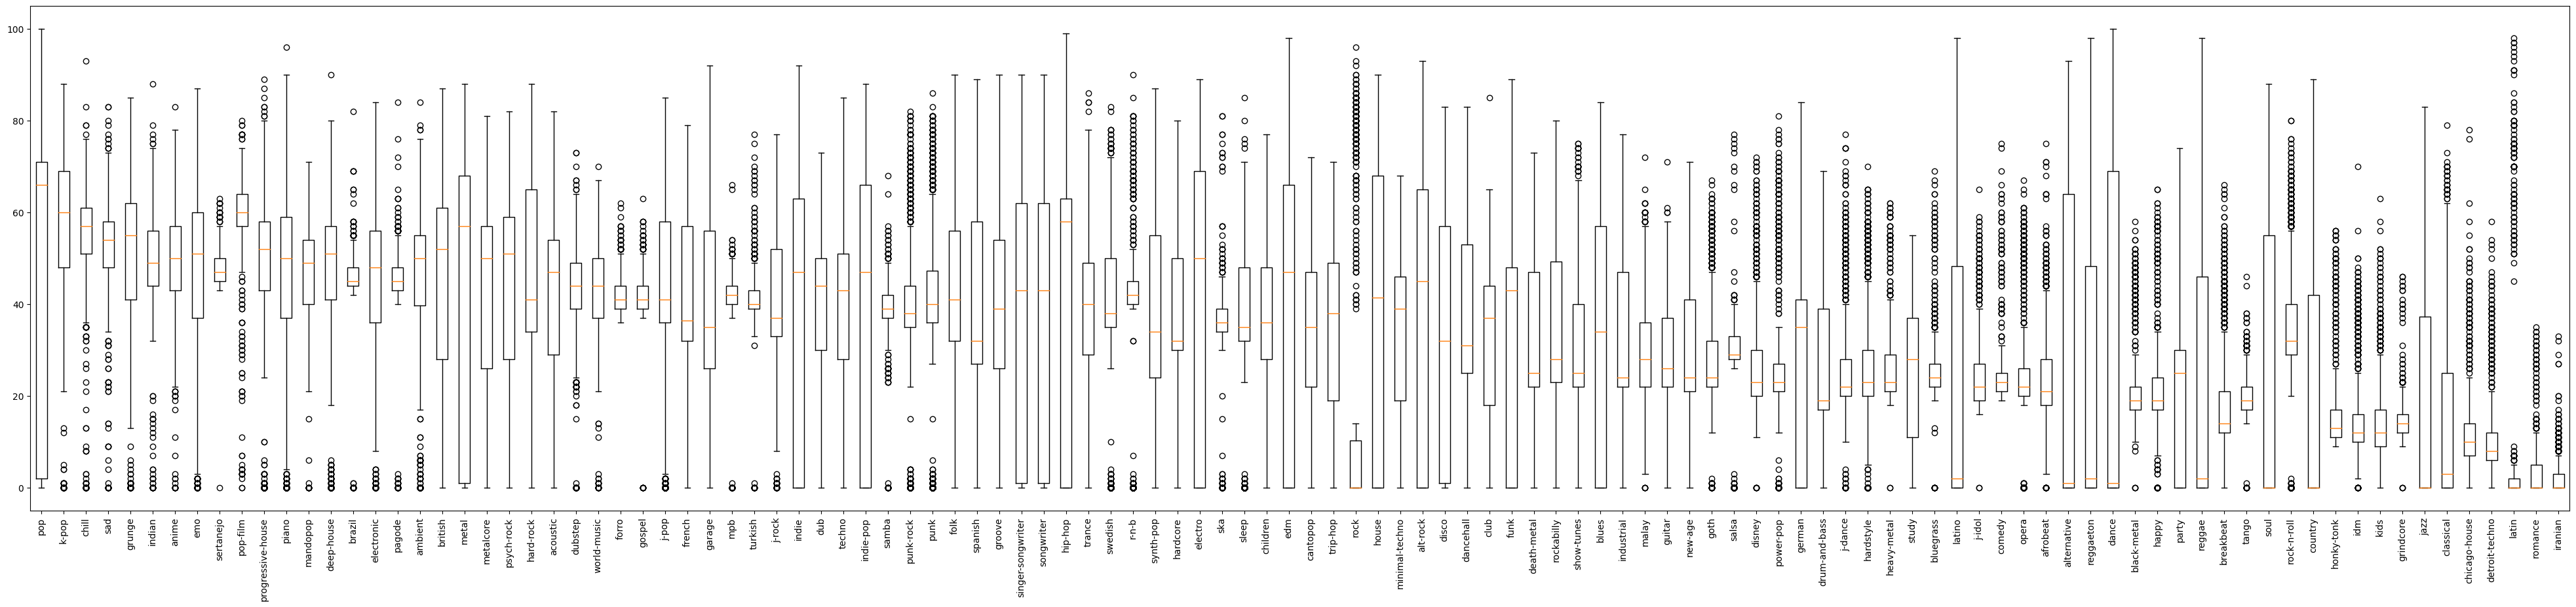

In [181]:
pop = songs_data[['track_genre','popularity']]

genres = pop['track_genre'].drop_duplicates()
genres = genres.astype('category').values


seriesArray = []
for gen in genres:
    values = pop[pop['track_genre'] == gen]['popularity'].values
    s= pd.Series(values, name=gen)
    seriesArray.append(s)
   
# popularity
popularity = pd.DataFrame(seriesArray)
# print(loc.reset_index()['index'].values)
popularity = popularity.iloc[loc.reset_index()['index'].values].transpose()
# print(popularity)
plt.figure()
plt.rcParams['figure.figsize'] = [50, 10]
plt.boxplot(popularity, labels=popularity.columns)
plt.xticks(rotation=90)
plt.savefig('boxplots.png')



